# **Assignment: Ridge and Lasso Implementation**

**Course:** Machine Learning <br/>
**Program & Section:** BS in Data Science - DS3A

**Members:** <br>
Baguio, Christian Jay <br>
Bandivas, Roxanne Mae <br>
Barrio, Reyjane Mae <br>
Palmes, Jhibsam <br>
Sabacajan, Cle Michael <br>
Tapao, Mark Vincent

**Assignment.** <br>  

**(Groupwork but submit individually)** <br>
Uploaded here is a Parkinson's Dataset. Use all features in the dataset in predicting **'total_UPDRS' with column name 'Target'** <br>  

Create the following: <br>  

    • A kNN Regression Model (n_neighbors = [1, 3, 5, 10, 20, 30]) 
    • A Ridge Regression (L2) Model (alpha values = [10, 1, 0.1, 0.01]) 
    • A Lasso Regression (L1) Model (alpha values = [10, 1, 0.1, 0.01], max_iter=100000 
    
Compare the results of each model in terms of train and test performance. <br>  

**Submit a Jupyter Notebook individually in USTeP.**

## Import Libraries

In [1]:
import numpy as np
import pylab as plot
import pandas as pd
pd.options.display.float_format = '{:,.2g}'.format
import seaborn as sns
sns.set_theme(font='Times New Roman')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('parkinsons.xlsx')
df.head()

,subject#,age,sex,test_time,motor_score,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,Target
0,1,72,0,5.6,28,0.0066,3.4e-05,0.004,0.0032,0.012,...,0.014,0.013,0.017,0.043,0.014,22,0.42,0.55,0.16,34
1,1,72,0,13,28,0.003,1.7e-05,0.0013,0.0015,0.004,...,0.0099,0.011,0.017,0.03,0.011,27,0.43,0.56,0.11,35
2,1,72,0,20,29,0.0048,2.5e-05,0.0021,0.0021,0.0062,...,0.0073,0.0084,0.015,0.022,0.02,23,0.46,0.54,0.21,35
3,1,72,0,26,29,0.0053,2.7e-05,0.0019,0.0026,0.0057,...,0.011,0.013,0.02,0.033,0.028,24,0.49,0.58,0.33,36
4,1,72,0,34,29,0.0034,2e-05,0.00093,0.0013,0.0028,...,0.0068,0.0093,0.018,0.02,0.012,26,0.47,0.56,0.19,36


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_score    5875 non-null   float64
 5   Jitter(%)      5875 non-null   float64
 6   Jitter(Abs)    5875 non-null   float64
 7   Jitter:RAP     5875 non-null   float64
 8   Jitter:PPQ5    5875 non-null   float64
 9   Jitter:DDP     5875 non-null   float64
 10  Shimmer        5875 non-null   float64
 11  Shimmer(dB)    5875 non-null   float64
 12  Shimmer:APQ3   5875 non-null   float64
 13  Shimmer:APQ5   5875 non-null   float64
 14  Shimmer:APQ11  5875 non-null   float64
 15  Shimmer:DDA    5875 non-null   float64
 16  NHR            5875 non-null   float64
 17  HNR            5875 non-null   float64
 18  RPDE    

In [4]:
X = df.drop(['Target'], axis = 1)
y = df['Target']

mms = MinMaxScaler()
X_norm = mms.fit_transform(X)

## kNN Regression Model

In [5]:
X_train, X_test, y_train, y_test = tts(X_norm, y, random_state = 42, test_size = 0.25)

  File "C:\Users\jhibs\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


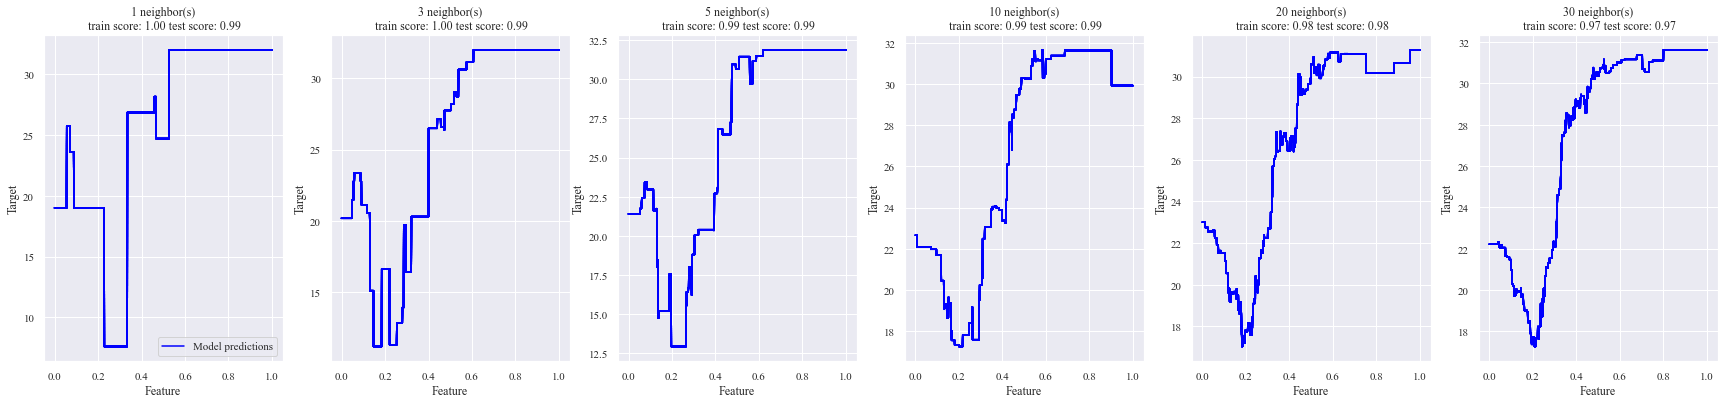

In [6]:
X_min = np.min(X_norm, axis=0)
X_max = np.max(X_norm, axis=0)
line = np.linspace(X_min, X_max, len(X_norm)).reshape(len(X_norm), -1)

X_train, X_test, y_train, y_test = tts(X_norm, y, test_size=0.25, random_state=42)

fig, axes = plt.subplots(1, 6, figsize=(30, 6)) 
for n_neighbors, ax in zip([1, 3, 5, 10, 20, 30], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line), 'blue')
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors,reg.score(X_train, y_train),
                                                                         reg.score(X_test,y_test)))    
    ax.set_xlabel("Feature")  
    ax.set_ylabel("Target")     

axes[0].legend(["Model predictions"],loc='lower right')
plt.show()

n_neighbors: 1.000000
training set score: 1.000000
test set score: 0.992474

n_neighbors: 3.000000
training set score: 0.996204
test set score: 0.992640

n_neighbors: 5.000000
training set score: 0.993972
test set score: 0.992601

n_neighbors: 10.000000
training set score: 0.989444
test set score: 0.989820

n_neighbors: 20.000000
training set score: 0.981796
test set score: 0.982743

n_neighbors: 30.000000
training set score: 0.974064
test set score: 0.973845



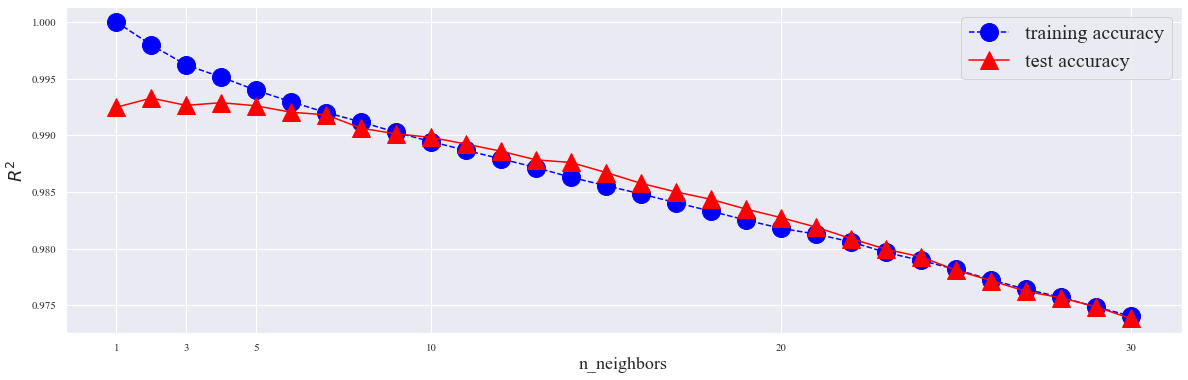

In [7]:
training_accuracy = []  
test_accuracy = []
ticks = [1, 3, 5, 10, 20, 30]

neighbors_settings = range(1, 31)

for n_neighbors in neighbors_settings:   
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train) 
    training_accuracy.append(reg.score(X_train, y_train)) 
    test_accuracy.append(reg.score(X_test, y_test)) 

fig = plt.figure(figsize=(20, 6))

params = {'legend.fontsize': 20, 'legend.handlelength': 2}
plot.rcParams.update(params)

plt.plot(neighbors_settings, training_accuracy, label="training accuracy", 
         color='blue', marker='o', linestyle='dashed', markersize=18)

plt.plot(neighbors_settings, test_accuracy, label="test accuracy",
         color='red', marker='^', linestyle='-', markersize=18)

plt.ylabel("$R^2$", fontsize=18)
plt.xlabel("n_neighbors",fontsize=18)
plt.xticks(ticks=ticks)
plt.legend()

for n_neighbors in ticks:
    reg = KNeighborsRegressor(n_neighbors=n_neighbors).fit(X_train, y_train)
    training_accuracy.append(reg.score(X_train, y_train))
    test_accuracy.append(reg.score(X_test, y_test))
    print("n_neighbors: %f" % n_neighbors)
    print("training set score: %f" % reg.score(X_train, y_train))
    print("test set score: %f\n" % reg.score(X_test, y_test))

pass

## Ridge Regression (L2) Model

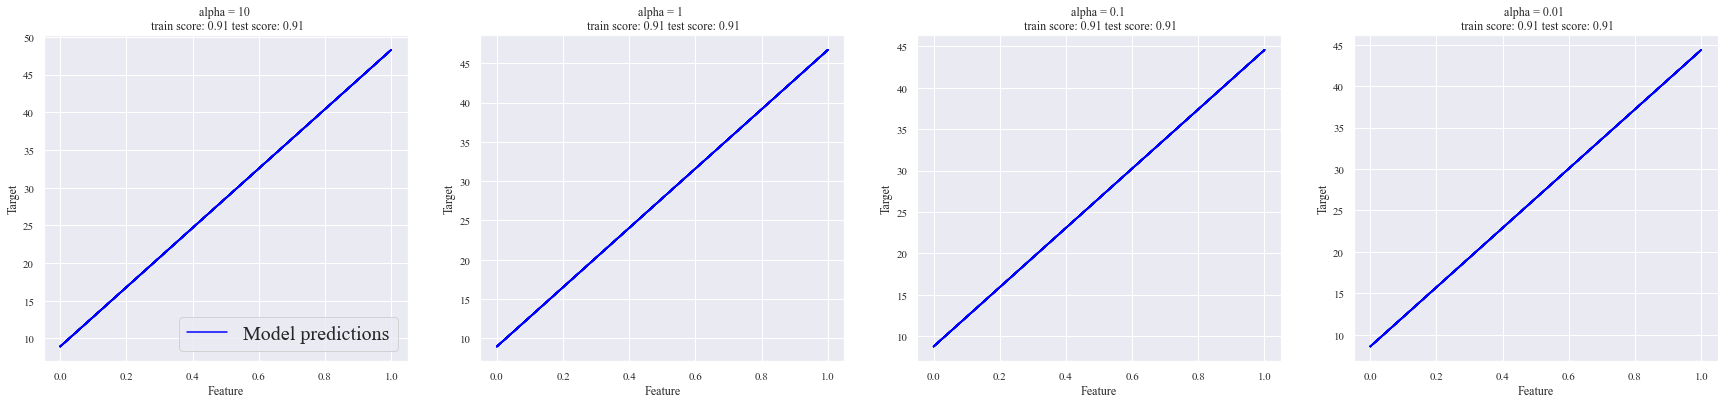

In [8]:
fig, axes = plt.subplots(1, 4, figsize=(30, 6)) 
for alpha, ax in zip([10, 1, 0.1, 0.01], axes):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ax.plot(line, ridge.predict(line), 'blue')
    ax.set_title(
        "alpha = {} \n train score: {:.2f} test score: {:.2f}".format(alpha,ridge.score(X_train, y_train),
                                                                         ridge.score(X_test,y_test)))    
    ax.set_xlabel("Feature")  
    ax.set_ylabel("Target")         

axes[0].legend(["Model predictions"], loc='lower right')
plt.show()

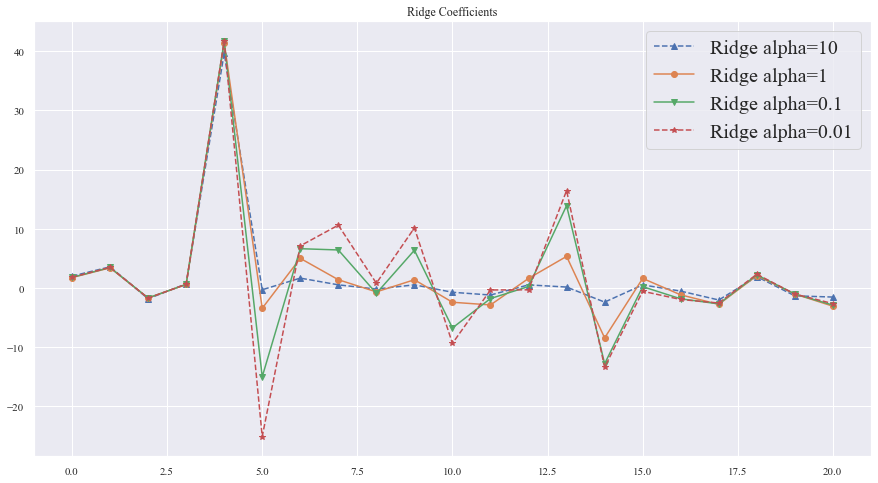

In [9]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
ridge1 = Ridge(alpha=1).fit(X_train, y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
ridge001 = Ridge(alpha=0.01).fit(X_train, y_train)

fig = plt.figure(figsize=(15, 8))

plt.title("Ridge Coefficients")
plt.plot(ridge10.coef_, '--^', label="Ridge alpha=10")
plt.plot(ridge1.coef_, '-o', label="Ridge alpha=1")
plt.plot(ridge01.coef_, '-v', label="Ridge alpha=0.1")
plt.plot(ridge001.coef_, '--*', label="Ridge alpha=0.01")
plt.legend()
plt.show()

alpha_run: 0.010000
training set score: 0.909924
test set score: 0.909719

alpha_run: 0.100000
training set score: 0.909864
test set score: 0.909398

alpha_run: 1.000000
training set score: 0.909464
test set score: 0.908805

alpha_run: 10.000000
training set score: 0.907065
test set score: 0.906862



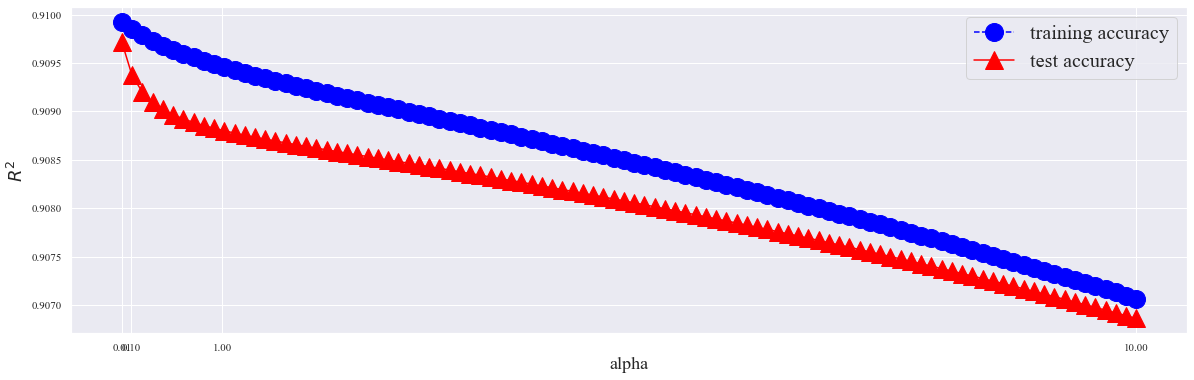

In [10]:
training_accuracy = []  
test_accuracy = []
ticks = [0.01, 0.1, 1, 10]

alpha_settings = np.linspace(0.01, 10, 100)

for alpha in alpha_settings:   
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train) 
    training_accuracy.append(ridge.score(X_train, y_train)) 
    test_accuracy.append(ridge.score(X_test, y_test)) 

fig = plt.figure(figsize=(20, 6))

params = {'legend.fontsize': 20, 'legend.handlelength': 2}
plot.rcParams.update(params)

plt.plot(alpha_settings, training_accuracy, label="training accuracy", 
         color='blue', marker='o', linestyle='dashed', markersize=18)

plt.plot(alpha_settings, test_accuracy, label="test accuracy",
         color='red', marker='^', linestyle='-', markersize=18)

plt.ylabel("$R^2$", fontsize=18)
plt.xlabel("alpha",fontsize=18)
plt.xticks(ticks=ticks)
plt.legend()

for alpha_run in ticks:
    ridge = Ridge(alpha=alpha_run).fit(X_train, y_train)
    training_accuracy.append(ridge.score(X_train, y_train))
    test_accuracy.append(ridge.score(X_test, y_test))
    print("alpha_run: %f" % alpha_run)
    print("training set score: %f" % ridge.score(X_train, y_train))
    print("test set score: %f\n" % ridge.score(X_test, y_test))
    
pass

## Lasso Regression (L1) Model

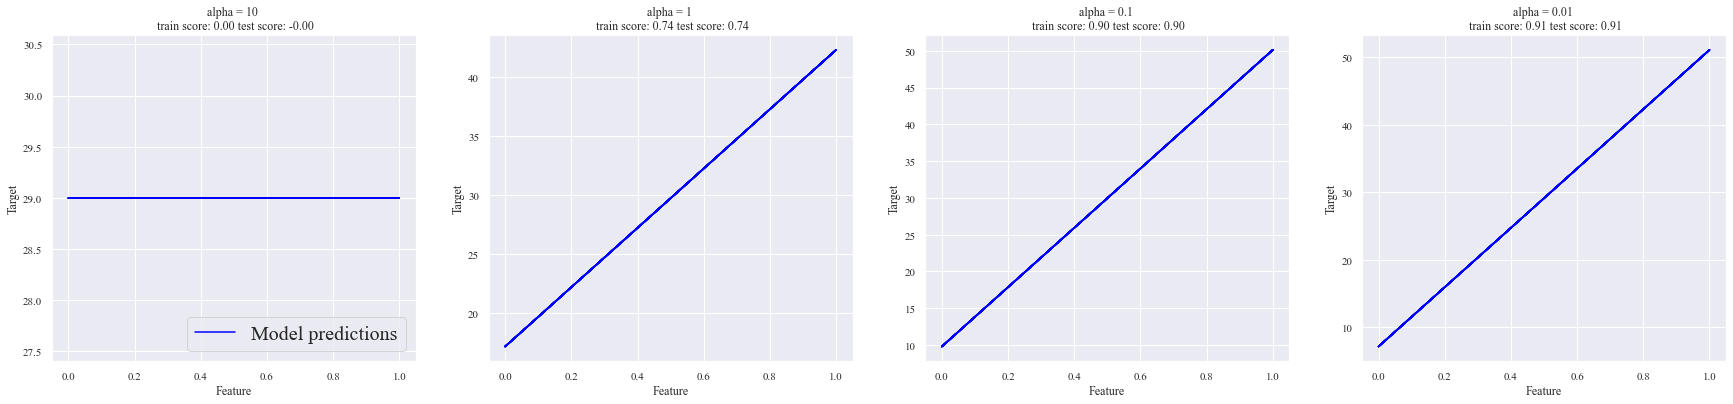

In [11]:
fig, axes = plt.subplots(1, 4, figsize=(30, 6)) 
for alpha, ax in zip([10, 1, 0.1, 0.01], axes):
    lasso = Lasso(alpha=alpha, max_iter=100000)
    lasso.fit(X_train, y_train)
    ax.plot(line, lasso.predict(line), 'blue')
    ax.set_title(
        "alpha = {} \n train score: {:.2f} test score: {:.2f}".format(alpha,lasso.score(X_train, y_train),
                                                                         lasso.score(X_test,y_test)))    
    ax.set_xlabel("Feature")  
    ax.set_ylabel("Target")         

axes[0].legend(["Model predictions"], loc='lower right')    
plt.show()

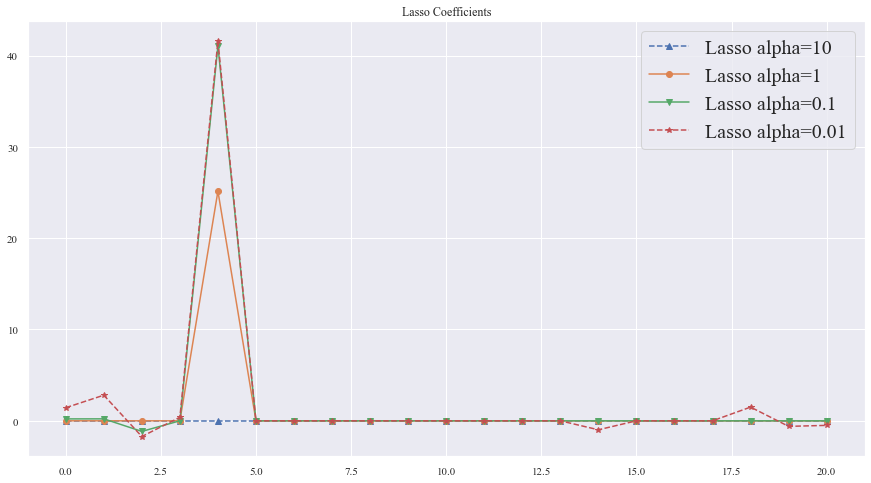

In [12]:
lasso10 = Lasso(alpha=10, max_iter=100000).fit(X_train, y_train)
lasso1 = Lasso(alpha=1, max_iter=100000).fit(X_train, y_train)
lasso01 = Lasso(alpha=0.1, max_iter=100000).fit(X_train, y_train)
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

fig = plt.figure(figsize=(15, 8))

plt.title("Lasso Coefficients")
plt.plot(lasso10.coef_, '--^', label="Lasso alpha=10")
plt.plot(lasso1.coef_, '-o', label="Lasso alpha=1")
plt.plot(lasso01.coef_, '-v', label="Lasso alpha=0.1")
plt.plot(lasso001.coef_, '--*', label="Lasso alpha=0.01")
plt.legend()
plt.show()

alpha_run: 0.010000
training set score: 0.907505
test set score: 0.905947

alpha_run: 0.100000
training set score: 0.901672
test set score: 0.897447

alpha_run: 1.000000
training set score: 0.743439
test set score: 0.740802

alpha_run: 10.000000
training set score: 0.000000
test set score: -0.000076



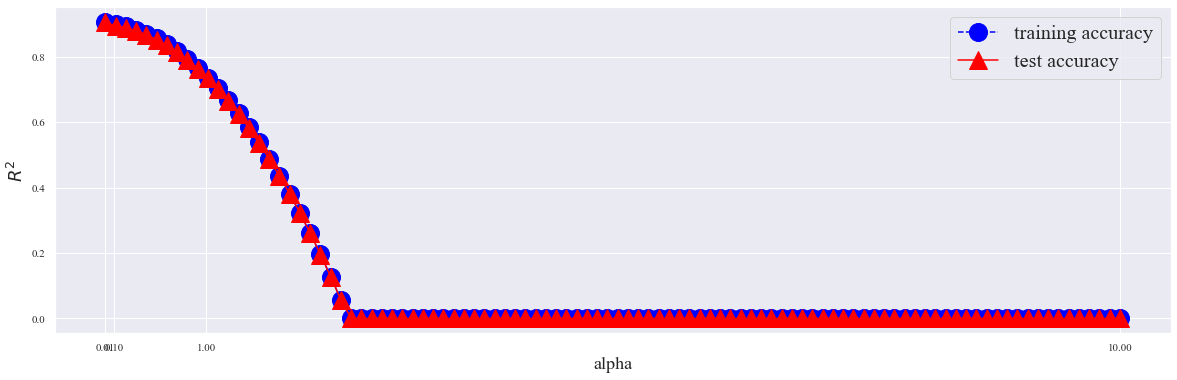

In [13]:
training_accuracy = []  
test_accuracy = []
ticks = [0.01, 0.1, 1, 10]

alpha_settings = np.linspace(0.01, 10, 100)

for alpha in alpha_settings:   
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train) 
    training_accuracy.append(lasso.score(X_train, y_train)) 
    test_accuracy.append(lasso.score(X_test, y_test)) 

fig = plt.figure(figsize=(20, 6))

params = {'legend.fontsize': 20, 'legend.handlelength': 2}
plot.rcParams.update(params)

plt.plot(alpha_settings, training_accuracy, label="training accuracy", 
         color='blue', marker='o', linestyle='dashed', markersize=18)

plt.plot(alpha_settings, test_accuracy, label="test accuracy",
         color='red', marker='^', linestyle='-', markersize=18)

plt.ylabel("$R^2$", fontsize=18)
plt.xlabel("alpha",fontsize=18)
plt.xticks(ticks=ticks)
plt.legend()

for alpha_run in ticks:
    lasso = Lasso(alpha=alpha_run, max_iter=100000).fit(X_train, y_train)
    training_accuracy.append(lasso.score(X_train, y_train))
    test_accuracy.append(lasso.score(X_test, y_test))
    print("alpha_run: %f" % alpha_run)
    print("training set score: %f" % lasso.score(X_train, y_train))
    print("test set score: %f\n" % lasso.score(X_test, y_test))

pass

## Comparative Analysis

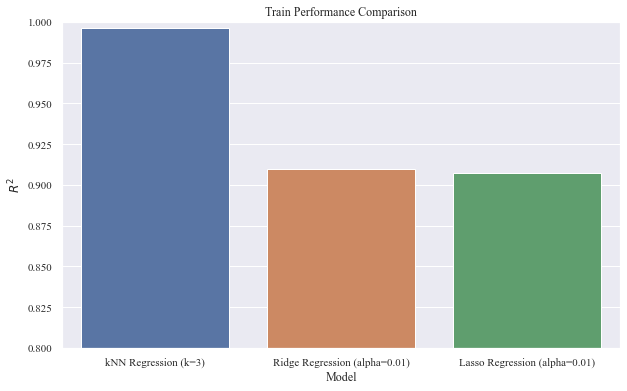

In [16]:
knn3 = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)
knn_pred = knn3.predict(X_test)
ridge_pred = ridge001.predict(X_test)
lasso_pred = lasso001.predict(X_test)

models = ['kNN Regression (k=3)', 'Ridge Regression (alpha=0.01)', 'Lasso Regression (alpha=0.01)']
train_score = [knn3.score(X_train, y_train), ridge001.score(X_train, y_train), lasso001.score(X_train, y_train)]

plt.figure(figsize = (10, 6))
sns.barplot(x = models, y = train_score)
plt.title('Train Performance Comparison')
plt.xlabel('Model')
plt.ylabel('$R^2$')
plt.ylim(0.8, 1.0)
plt.show()

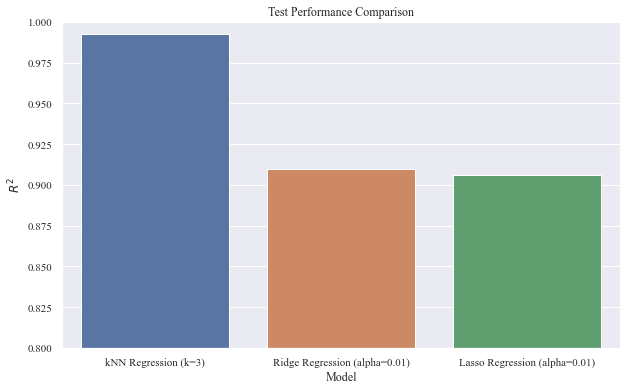

In [17]:
test_score = [r2_score(y_test, knn_pred), r2_score(y_test, ridge_pred), r2_score(y_test, lasso_pred)]

plt.figure(figsize = (10, 6))
sns.barplot(x = models, y = test_score)
plt.title('Test Performance Comparison')
plt.xlabel('Model')
plt.ylabel('$R^2$')
plt.ylim(0.8, 1.0)
plt.show()

**kNN Regression Model:**

    • Best Performance: kNN regression model with n_neighbors = 3 performed best.
    • Training Set Score: 0.996204
    • Test Set Score: 0.992640
    • Analysis: The performance of the model starts to decline as the number of neighbors increases beyond 5.    
    
**Ridge Regression (L2) Model:**

    • Best Performance: Ridge regression model with alpha = 0.01 performed best.
    • Training Set Score: 0.909924
    • Test Set Score: 0.909719
    • Analysis: The model's performance starts to decline as the regularization strength (alpha) increases, indicating that the model starts to perform poorly with higher values of alpha.
    
**Lasso Regression (L1) Model:**

    • Best Performance: Lasso regression model with alpha = 0.01 performed best.
    • Training Set Score: 0.907505
    • Test Set Score: 0.905947
    • Analysis: Similar to the Ridge regression, the performance of the Lasso regression starts to decline as the regulariz-ation strength (alpha) increases. Higher values of alpha lead to more sparsity in the coefficients which may not capture all the important features in the data, leading to decreased performance.
    
<br> 

In summary, the kNN regression model with n_neighbors = 3 provided the best performance among the three models, achieving high accuracy on both the training and test sets.